<a href="https://colab.research.google.com/github/homosapienssapiens/feature-engineering/blob/main/Solis_Orozco_Miguel_Angel_Laboratotio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Miguel Angel Solis Orozco
#Laboratorio 2

###1- Leer el archivo de Excel, en él se muestran las fechas de adquisición, los niveles, las entradas y salidas de caudal referente a 4 tanques. Mostrar el histograma de los datos.


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
data = pd.read_excel("/content/drive/MyDrive/Maestría en ciencia de datos/2do semestre/Ingeniería de características/Laboratorio 2/Datos.xlsx")
data.head()

,Fecha,Nivel 1,Nivel 2,Nivel 3,Nivel 4,Salida 1,Salida 2,Salida 3,Salida 4,Entrada 1,Entrada 2,Entrada 3,Entrada 4
0,2006-01-01,532.88,391.88,182.86,85.68,9940000.0,16230000.0,30970000.0,29710000.0,6050000.0,9220000.0,22090000.0,5390000.0
1,2006-01-02,532.87,392.02,182.86,85.80,44260000.0,50960000.0,42100000.0,48080000.0,4720000.0,7585000.0,37340000.0,700000.0
2,2006-01-03,532.80,391.00,182.87,85.70,50180000.0,46700000.0,45940000.0,47790000.0,4460000.0,5950000.0,17540000.0,10140000.0
3,2006-01-04,532.72,391.47,182.90,85.85,44850000.0,44290000.0,44900000.0,47690000.0,34740000.0,3260000.0,20250000.0,6600000.0
4,2006-01-05,532.70,391.66,182.90,85.92,41690000.0,48170000.0,49080000.0,49140000.0,1910000.0,7340000.0,23180000.0,3390000.0


Histogramas del tanque 1

Text(0.5, 0, 'Entrada 1')

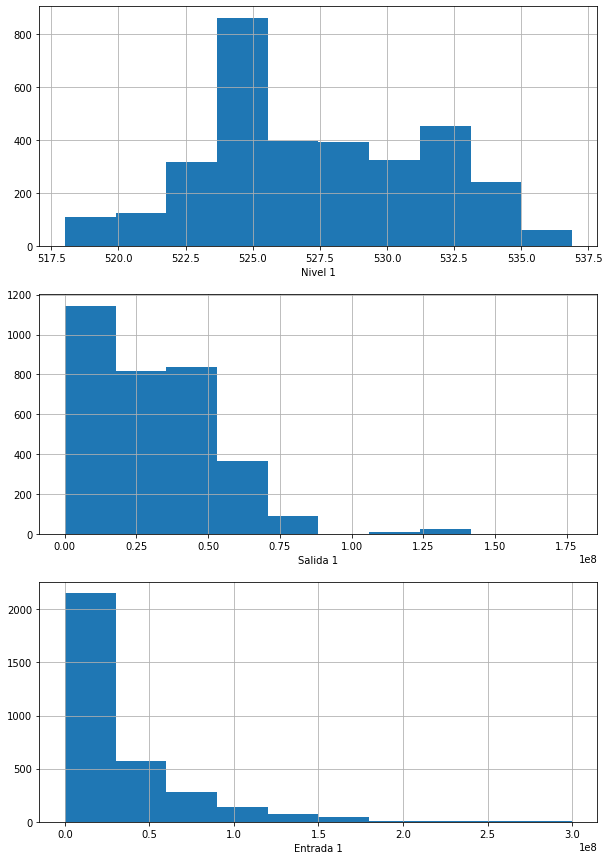

In [3]:
plt.figure(figsize = (10, 15))
plt.subplot(3, 1, 1)
plt.hist(data['Nivel 1'])
plt.grid()
plt.xlabel("Nivel 1")
plt.subplot(3, 1, 2)
plt.hist(data['Salida 1'])
plt.grid()
plt.xlabel("Salida 1")
plt.subplot(3, 1, 3)
plt.hist(data['Entrada 1'])
plt.grid()
plt.xlabel("Entrada 1")

Histogramas del tanque 2

Text(0.5, 0, 'Entrada 2')

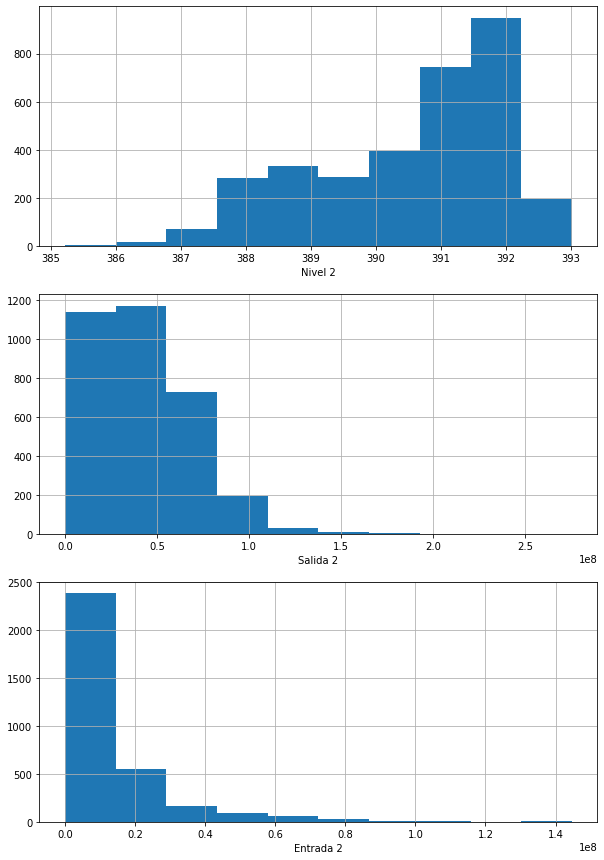

In [4]:
plt.figure(figsize = (10, 15))
plt.subplot(3, 1, 1)
plt.hist(data['Nivel 2'])
plt.grid()
plt.xlabel("Nivel 2")
plt.subplot(3, 1, 2)
plt.hist(data['Salida 2'])
plt.grid()
plt.xlabel("Salida 2")
plt.subplot(3, 1, 3)
plt.hist(data['Entrada 2'])
plt.grid()
plt.xlabel("Entrada 2")

Histogramas del tanque 3

Text(0.5, 0, 'Entrada 3')

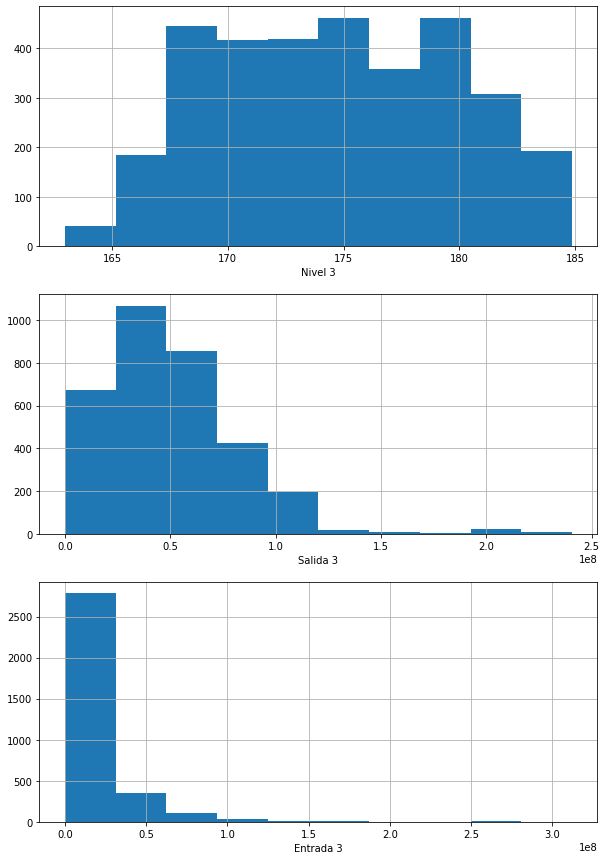

In [5]:
plt.figure(figsize = (10, 15))
plt.subplot(3, 1, 1)
plt.hist(data['Nivel 3'])
plt.grid()
plt.xlabel("Nivel 3")
plt.subplot(3, 1, 2)
plt.hist(data['Salida 3'])
plt.grid()
plt.xlabel("Salida 3")
plt.subplot(3, 1, 3)
plt.hist(data['Entrada 3'])
plt.grid()
plt.xlabel("Entrada 3")

Histogramas del tanque 4

Text(0.5, 0, 'Entrada 4')

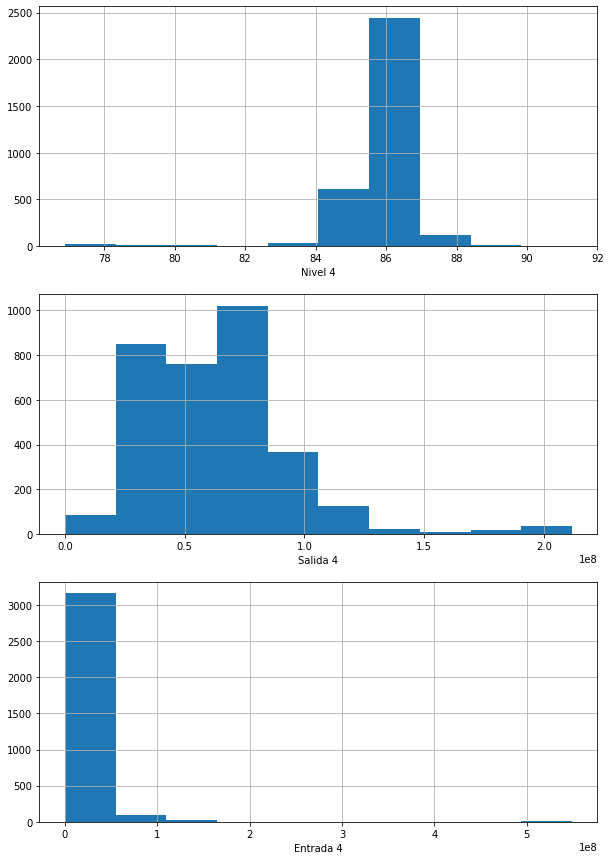

In [6]:
plt.figure(figsize = (10, 15))
plt.subplot(3, 1, 1)
plt.hist(data['Nivel 4'])
plt.grid()
plt.xlabel("Nivel 4")
plt.subplot(3, 1, 2)
plt.hist(data['Salida 4'])
plt.grid()
plt.xlabel("Salida 4")
plt.subplot(3, 1, 3)
plt.hist(data['Entrada 4'])
plt.grid()
plt.xlabel("Entrada 4")

###2- Transformar mediante boxcox cada variable y comparar antes y después de la transformación a través del histograma.

In [7]:
#Transformacion por saturación en Box-Cox (variable - min + 1)
n1_min = min(data['Nivel 1'])
data['Nivel 1'] = data['Nivel 1'] - n1_min + 1

In [8]:
#Reducimos databc a solo los niveles.
databc = data.drop(columns=['Fecha', 'Salida 1', 'Salida 2', 'Salida 3', 'Salida 4', 'Entrada 1', 'Entrada 2', 'Entrada 3', 'Entrada 4'])

In [9]:
#Función: aplica transformación Box-Cox a un dataframe completo
def dfboxcox(x, l):
  for i in x:
    x[i], l = stats.boxcox(x[i])
    print(l)

In [10]:
lbda = 0
dfboxcox(databc, lbda)

0.7270390006850777
59.73689429803208
0.2116212436029405
21.084393991614785


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


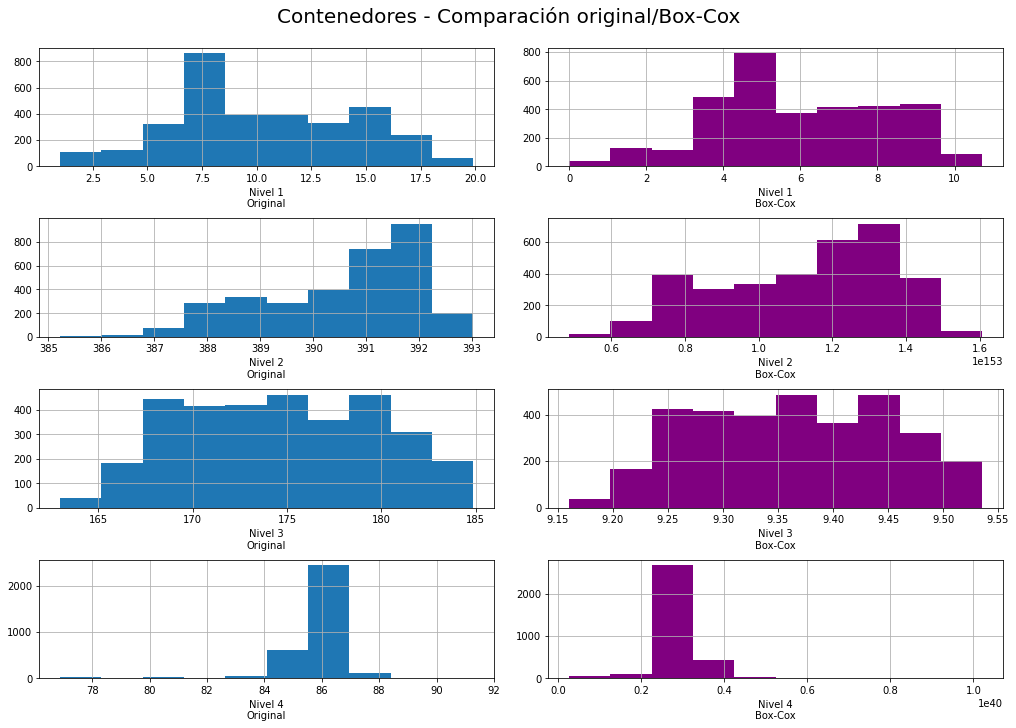

In [11]:
fig, p = plt.subplots(4, 2, constrained_layout = True)
p[0][0].hist(data['Nivel 1'])
p[0][0].grid()
p[0][0].set_xlabel("Nivel 1\nOriginal")
p[0][1].hist(databc['Nivel 1'], color = 'Purple')
p[0][1].grid()
p[0][1].set_xlabel("Nivel 1\nBox-Cox")

p[1][0].hist(data['Nivel 2'])
p[1][0].grid()
p[1][0].set_xlabel("Nivel 2\nOriginal")
p[1][1].hist(databc['Nivel 2'], color = 'Purple')
p[1][1].grid()
p[1][1].set_xlabel("Nivel 2\nBox-Cox")

p[2][0].hist(data['Nivel 3'])
p[2][0].grid()
p[2][0].set_xlabel("Nivel 3\nOriginal")
p[2][1].hist(databc['Nivel 3'], color = 'Purple')
p[2][1].grid()
p[2][1].set_xlabel("Nivel 3\nBox-Cox")

p[3][0].hist(data['Nivel 4'])
p[3][0].grid()
p[3][0].set_xlabel("Nivel 4\nOriginal")
p[3][1].hist(databc['Nivel 4'], color = 'Purple')
p[3][1].grid()
p[3][1].set_xlabel("Nivel 4\nBox-Cox")

fig.suptitle('Contenedores - Comparación original/Box-Cox', fontsize = 20)
fig.set_size_inches(14,10)

El contenedor 1 mejoró su forma a algo más normal pero la curtosis es extremadamente alta. No detecto una mejora significativa en los contenedores 2, 3 y 4.

###3- Explique, ¿por qué el conjunto completo de los datos transformados no se asemeja a una distribución normal? 

No se parecen a una distribución normal por varias razones:


*   Algunos tienen la curtosis demasiado exagerada.
*   Otros tienen sesgos positivos y negativos.



###4- Discretizar las variables de Nivel (sin transformar) por año.

In [12]:
datad = pd.DataFrame()

In [13]:
data['Año'] = data['Fecha'].dt.year
data.head()

,Fecha,Nivel 1,Nivel 2,Nivel 3,Nivel 4,Salida 1,Salida 2,Salida 3,Salida 4,Entrada 1,Entrada 2,Entrada 3,Entrada 4,Año
0,2006-01-01,15.88,391.88,182.86,85.68,9940000.0,16230000.0,30970000.0,29710000.0,6050000.0,9220000.0,22090000.0,5390000.0,2006
1,2006-01-02,15.87,392.02,182.86,85.80,44260000.0,50960000.0,42100000.0,48080000.0,4720000.0,7585000.0,37340000.0,700000.0,2006
2,2006-01-03,15.80,391.00,182.87,85.70,50180000.0,46700000.0,45940000.0,47790000.0,4460000.0,5950000.0,17540000.0,10140000.0,2006
3,2006-01-04,15.72,391.47,182.90,85.85,44850000.0,44290000.0,44900000.0,47690000.0,34740000.0,3260000.0,20250000.0,6600000.0,2006
4,2006-01-05,15.70,391.66,182.90,85.92,41690000.0,48170000.0,49080000.0,49140000.0,1910000.0,7340000.0,23180000.0,3390000.0,2006


###5- Transformar cada variable discretizada usando boxcox y comparar el histograma de ésta con la variable discretizada sin transformar.

Por cuestiones de uqe se está sobresaturando nuestros resultados ocn Box_Cox, tendré que  alinear las columnas de los niveles 3 y 4 al origen tal y como lo hice con la de Nivel 1.

In [14]:
n3_min = min(data['Nivel 3'])
n4_min = min(data['Nivel 4'])
n1_min, n3_min, n3_min

(518.0, 162.96, 162.96)

In [15]:
data['Nivel 3'] = data['Nivel 3'] - n3_min + 1
data['Nivel 4'] = data['Nivel 4'] - n4_min + 1

In [16]:
data.head()

,Fecha,Nivel 1,Nivel 2,Nivel 3,Nivel 4,Salida 1,Salida 2,Salida 3,Salida 4,Entrada 1,Entrada 2,Entrada 3,Entrada 4,Año
0,2006-01-01,15.88,391.88,20.90,9.80,9940000.0,16230000.0,30970000.0,29710000.0,6050000.0,9220000.0,22090000.0,5390000.0,2006
1,2006-01-02,15.87,392.02,20.90,9.92,44260000.0,50960000.0,42100000.0,48080000.0,4720000.0,7585000.0,37340000.0,700000.0,2006
2,2006-01-03,15.80,391.00,20.91,9.82,50180000.0,46700000.0,45940000.0,47790000.0,4460000.0,5950000.0,17540000.0,10140000.0,2006
3,2006-01-04,15.72,391.47,20.94,9.97,44850000.0,44290000.0,44900000.0,47690000.0,34740000.0,3260000.0,20250000.0,6600000.0,2006
4,2006-01-05,15.70,391.66,20.94,10.04,41690000.0,48170000.0,49080000.0,49140000.0,1910000.0,7340000.0,23180000.0,3390000.0,2006


In [17]:
#Función: Genera una tabla de comparación (original/Box-Cox) del nivel del contenedor por año.
def yearcomp(column, contenedor):
  fig, p = plt.subplots(9, 2, constrained_layout = True)
  j = 0
  k = 0
  for i in range(2006, 2015):
    filter = data.groupby('Año')[column].get_group(i).dropna()
    arr, l = stats.boxcox(filter)
    p[j][k].hist(filter)
    p[j][k].grid()
    p[j][k].set_xlabel(column + ' ' + str(i) + '\nOriginal')
    k = 1
    p[j][k].hist(arr, color = 'green')
    p[j][k].grid()
    p[j][k].set_xlabel(column + " " + str(i) + '\nBoxcox')
    j += 1
    k = 0

  fig.suptitle('Contenedor ' + str(contenedor) + ' discretizado por año - Comparación original/Box-Cox', fontsize = 20)
  fig.set_size_inches(14,30)

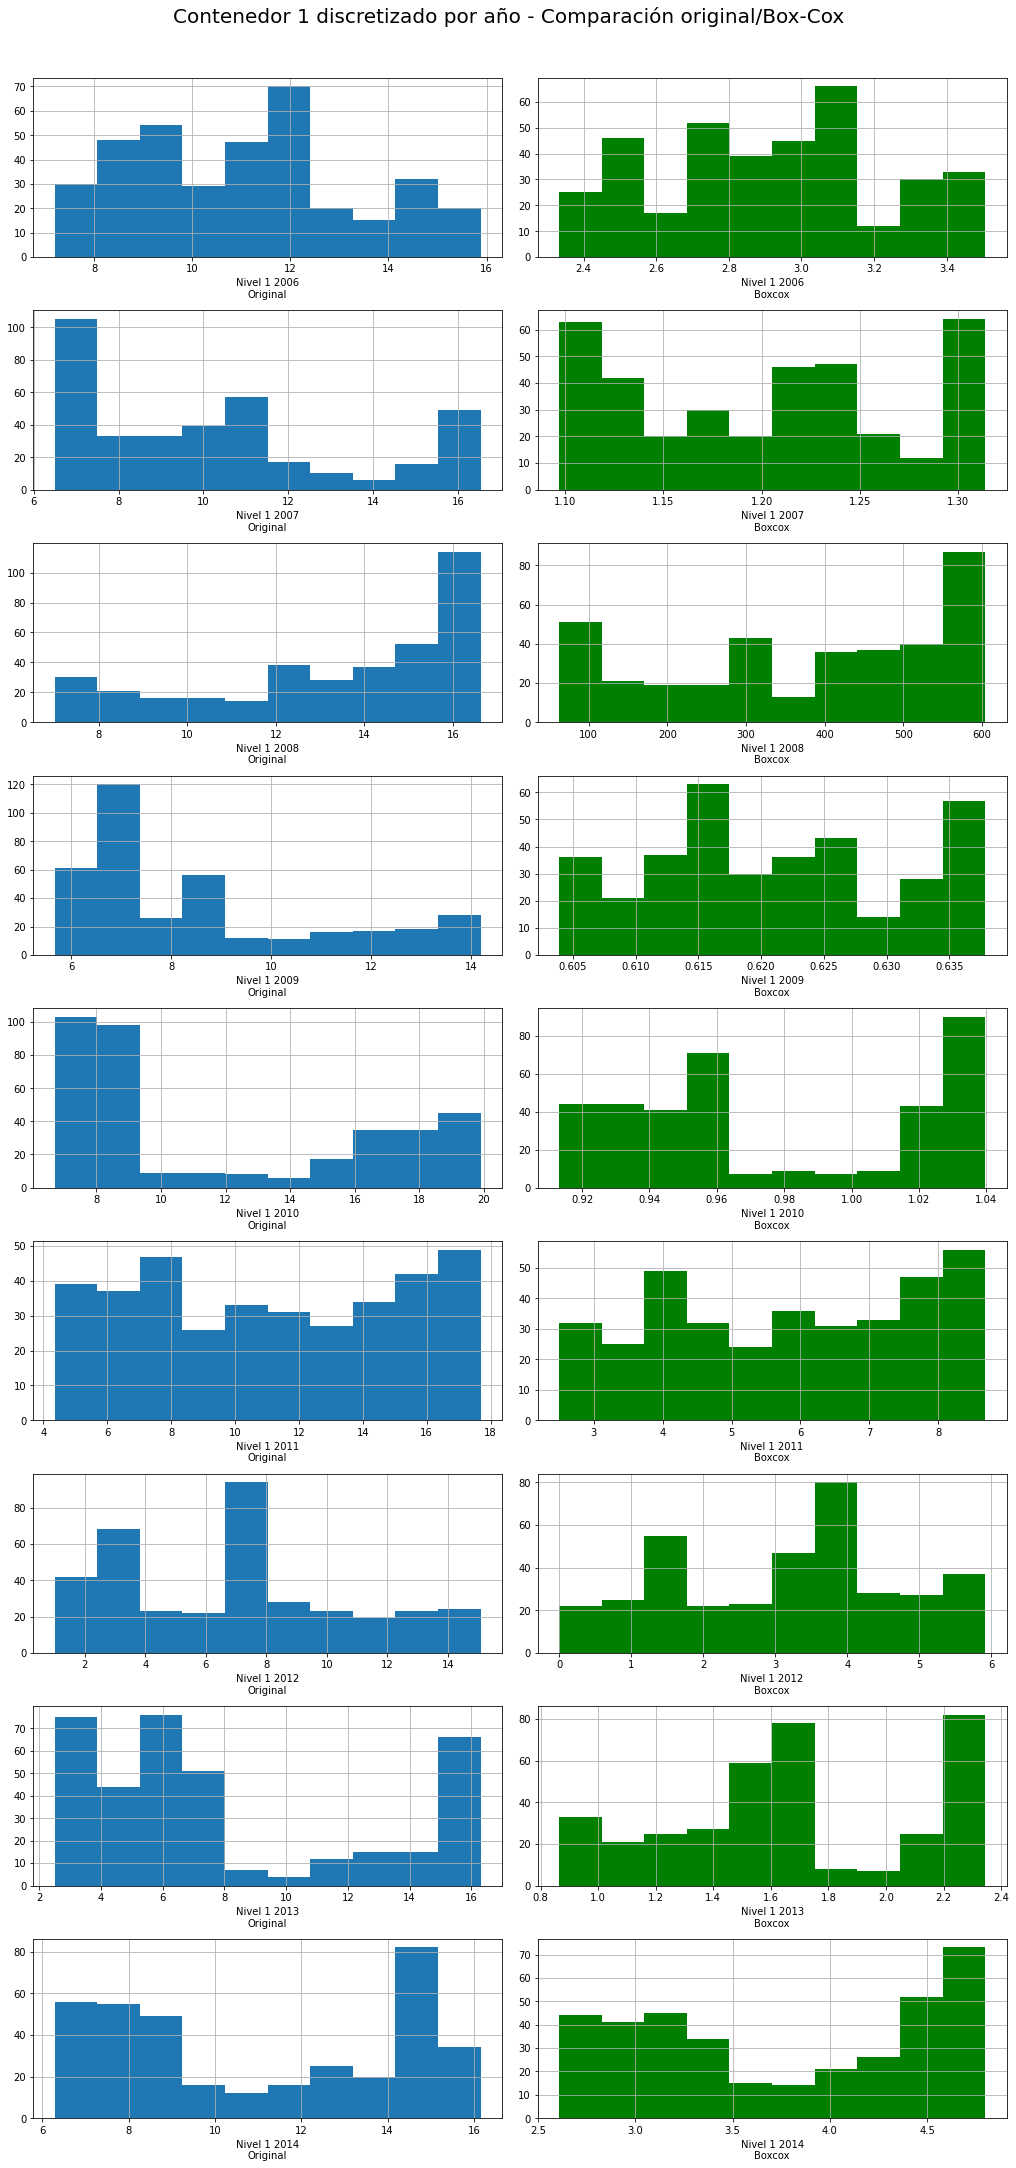

In [18]:
yearcomp('Nivel 1', 1)

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:908: RuntimeWarning: overflow encountered in power
  variance = np.var(data**lmb / lmb, axis=0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


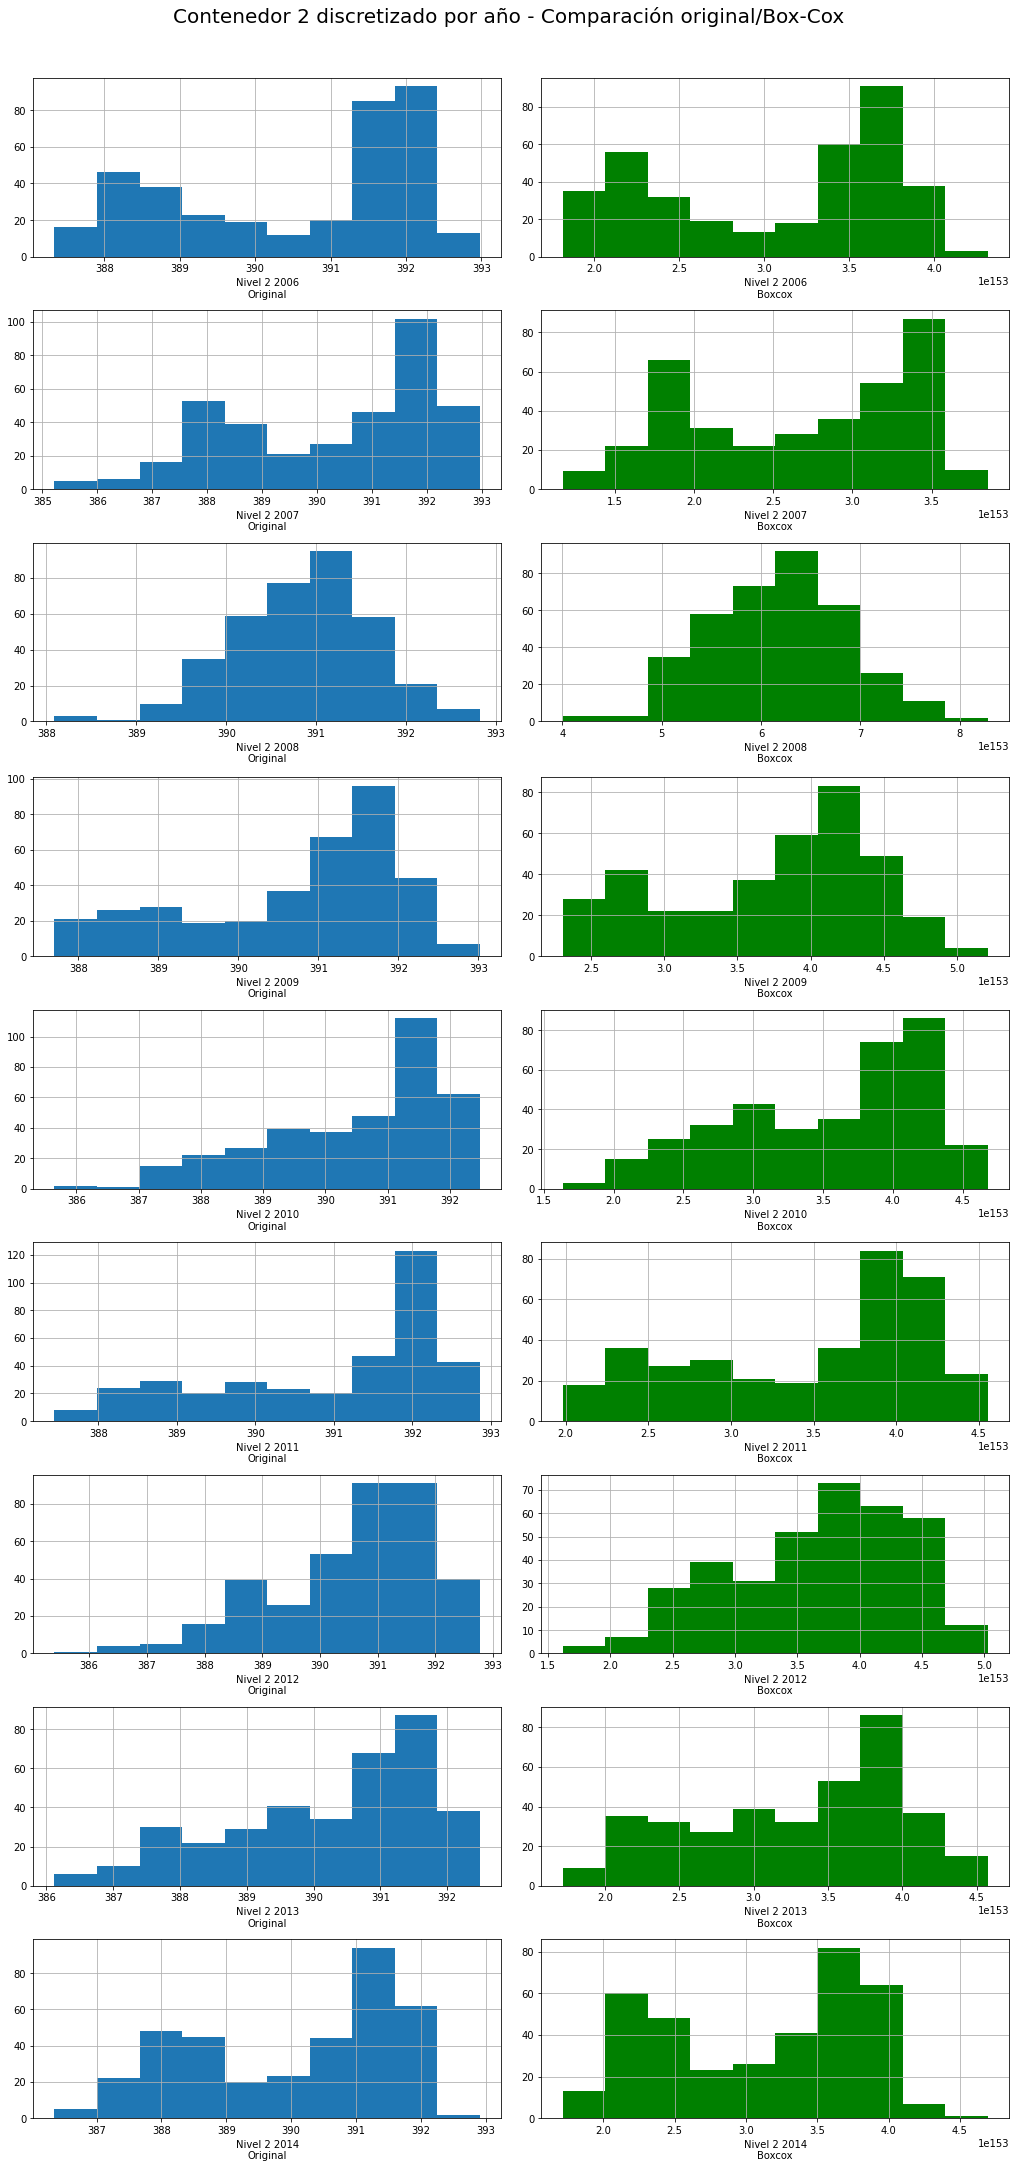

In [19]:
yearcomp('Nivel 2', 2)

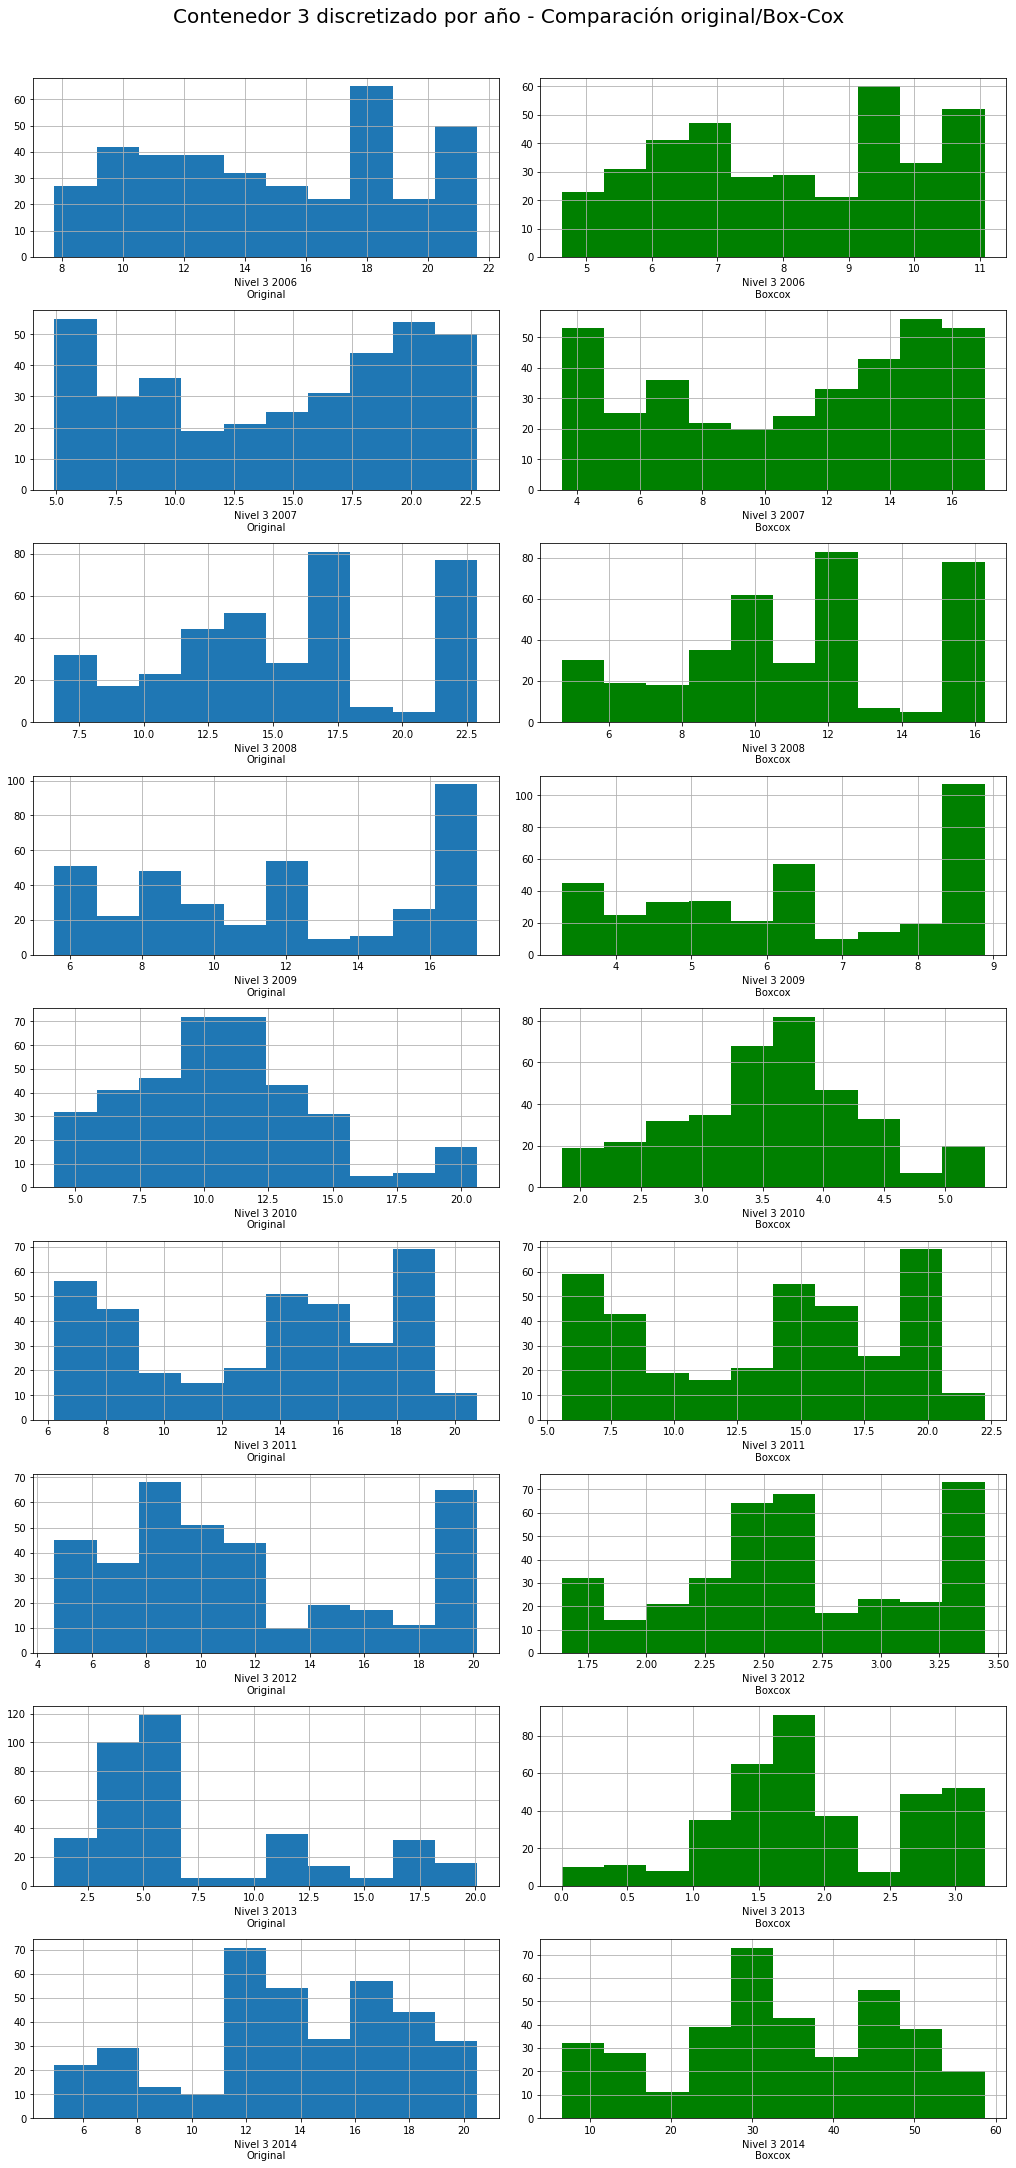

In [20]:
yearcomp('Nivel 3', 3)

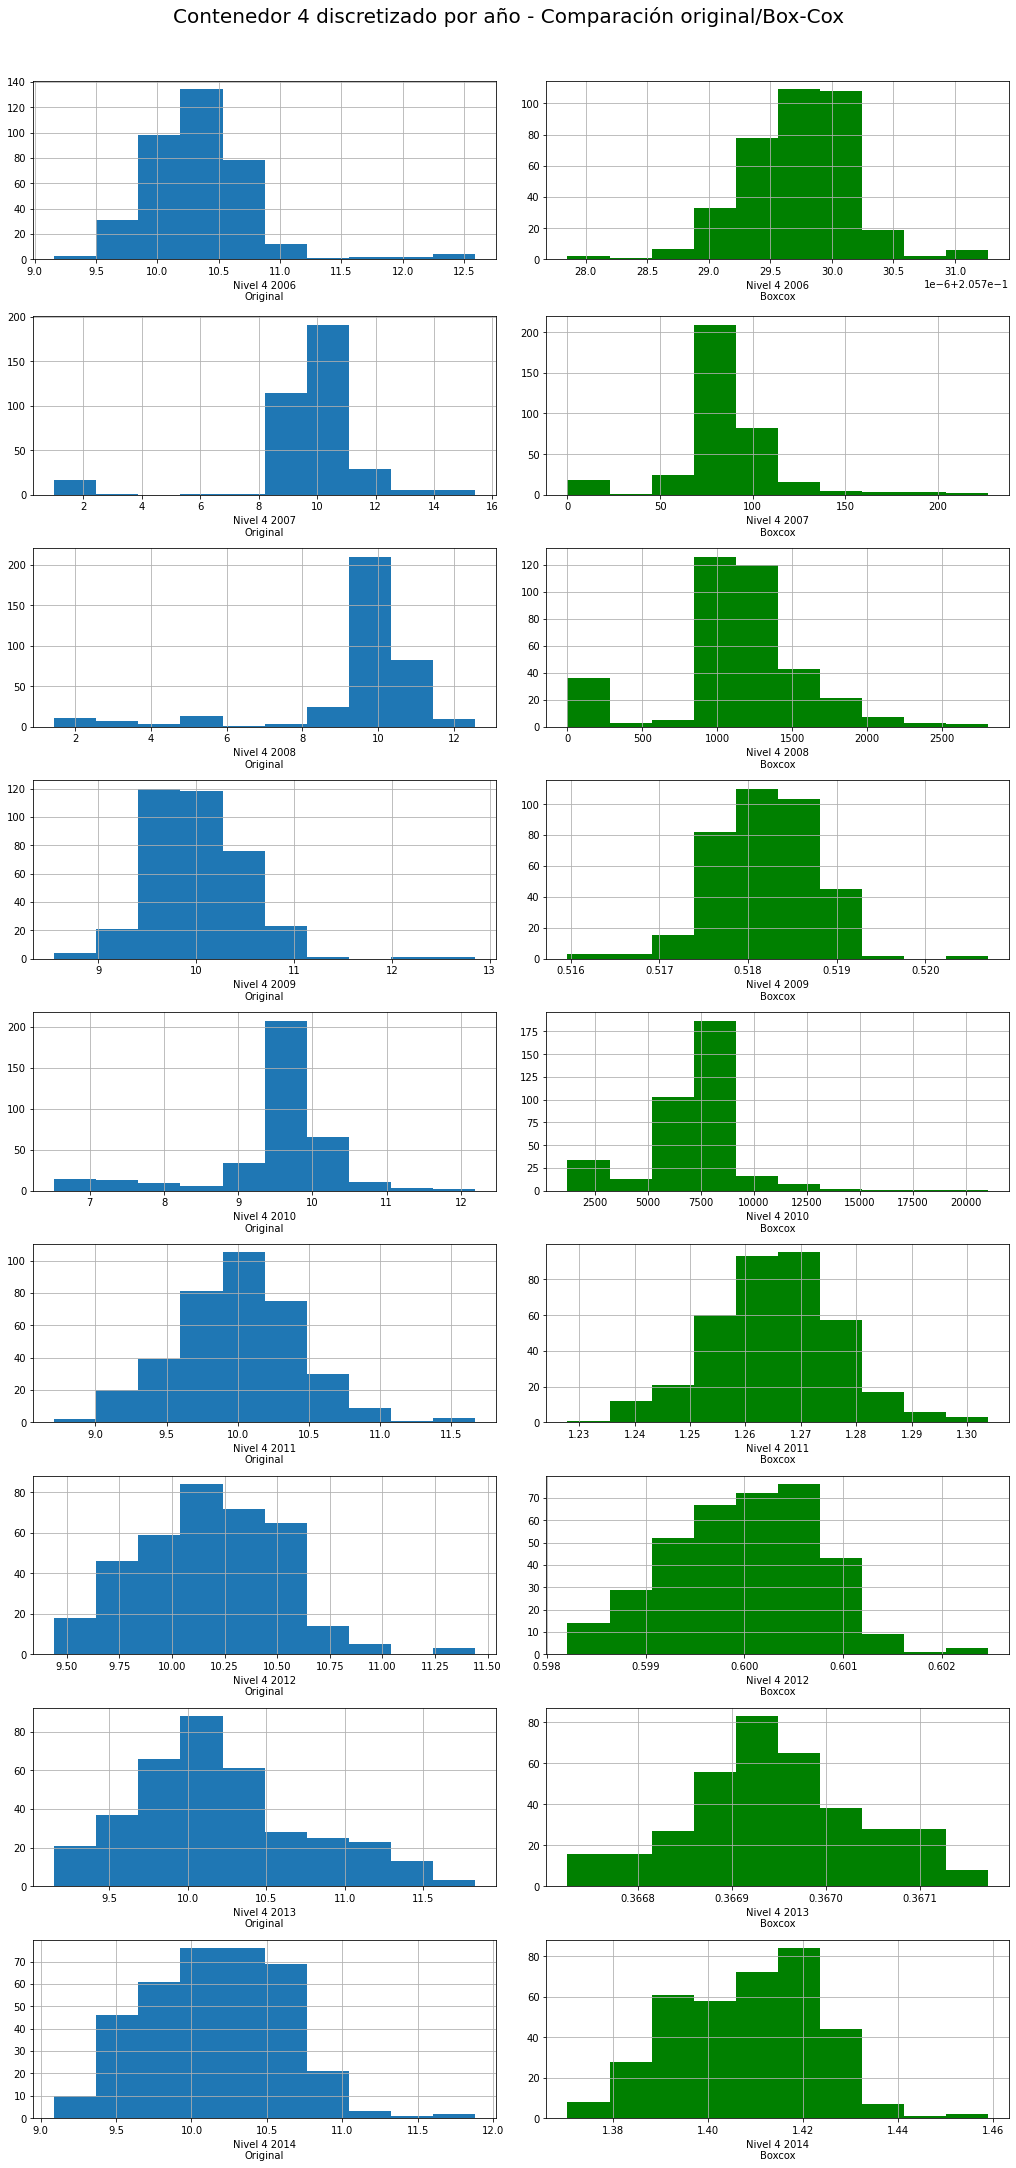

In [21]:
yearcomp('Nivel 4', 4)

###6- Debido al comportamiento periódico inusual de los datos, la distribución de los datos transformados no se asemeja a la normal, explique este comportamiento y proponga una solución usando este tipo de discretización (sugerencia: grafique los datos discretizados y encuentre un patrón para agrupar la información).

Usaré discretización de frecuencia constante

In [ ]:
#Quitamos la fecha y el año en el df data
data = data.drop(columns = ['Fecha', 'Año'])

In [45]:
#Creación de df para almacenar la discreticación
datadfc = pd.DataFrame()

Intervalos

In [24]:
#Discretización por frecuencia constante
bins=20
for i in data:  
  data[str(i) + ' disc'], intervalos = pd.qcut(data[i],bins,retbins=True)
  print('\n' + str(i) + ':\n ')
  print(intervalos)


Nivel 1:
 
[ 1.     3.653  5.61   6.56   6.78   7.145  7.51   7.92   8.304  8.67
  9.48  10.44  11.116 11.989 12.724 13.82  14.72  15.371 16.05  16.59
 19.9  ]

Nivel 2:
 
[385.22  387.85  388.23  388.59  388.98  389.475 389.87  390.2   390.53
 390.78  390.99  391.16  391.31  391.45  391.59  391.71  391.85  391.96
 392.1   392.28  393.02 ]

Nivel 3:
 
[ 1.     4.903  5.9    6.63   7.5    8.5    9.19  10.12  11.04  11.86
 12.41  13.323 14.16  15.269 16.21  16.865 17.458 18.58  19.514 20.937
 22.91 ]

Nivel 4:
 
[ 1.     9.13   9.36   9.49   9.6    9.7    9.78   9.84   9.91   9.977
 10.05  10.1   10.17  10.24  10.32  10.395 10.47  10.56  10.7   10.957
 15.4  ]

Salida 1:
 
[0.0000e+00 3.5300e+05 3.1160e+06 5.5700e+06 8.0420e+06 1.1020e+07
 1.4280e+07 1.7861e+07 2.1248e+07 2.4587e+07 2.8130e+07 3.1433e+07
 3.5716e+07 3.9245e+07 4.2430e+07 4.5535e+07 4.8390e+07 5.2849e+07
 5.8674e+07 6.7226e+07 1.7693e+08]

Salida 2:
 
[0.0000e+00 4.9600e+06 8.5860e+06 1.1838e+07 1.5894e+07 2.0290e+07
 2.

In [25]:
data.head()

,Nivel 1,Nivel 2,Nivel 3,Nivel 4,Salida 1,Salida 2,Salida 3,Salida 4,Entrada 1,Entrada 2,Entrada 3,Entrada 4,Nivel 1 disc,Nivel 2 disc,Nivel 3 disc,Nivel 4 disc,Salida 1 disc,Salida 2 disc,Salida 3 disc,Salida 4 disc,Entrada 1 disc,Entrada 2 disc,Entrada 3 disc,Entrada 4 disc
0,15.88,391.88,20.90,9.80,9940000.0,16230000.0,30970000.0,29710000.0,6050000.0,9220000.0,22090000.0,5390000.0,"(15.371, 16.05]","(391.85, 391.96]","(19.514, 20.937]","(9.78, 9.84]","(8042000.0, 11020000.0]","(15894000.0, 20290000.0]","(27440000.0, 31510000.0]","(27132000.0, 29866000.0]","(5060000.0, 6170000.0]","(8556000.0, 9929000.0]","(21110000.0, 24786000.0]","(5330000.0, 6126000.0]"
1,15.87,392.02,20.90,9.92,44260000.0,50960000.0,42100000.0,48080000.0,4720000.0,7585000.0,37340000.0,700000.0,"(15.371, 16.05]","(391.96, 392.1]","(19.514, 20.937]","(9.91, 9.977]","(42430000.0, 45535000.0]","(50799000.0, 54750000.0]","(39104000.0, 43073000.0]","(44280000.0, 49680000.0]","(4029000.0, 5060000.0]","(7280000.0, 8556000.0]","(31647000.0, 42052000.0]","(651500.0, 1448000.0]"
2,15.80,391.00,20.91,9.82,50180000.0,46700000.0,45940000.0,47790000.0,4460000.0,5950000.0,17540000.0,10140000.0,"(15.371, 16.05]","(390.99, 391.16]","(19.514, 20.937]","(9.78, 9.84]","(48390000.0, 52849000.0]","(43023000.0, 46932000.0]","(43073000.0, 46220000.0]","(44280000.0, 49680000.0]","(4029000.0, 5060000.0]","(5500000.0, 6350000.0]","(14836000.0, 17560000.0]","(10110000.0, 11460000.0]"
3,15.72,391.47,20.94,9.97,44850000.0,44290000.0,44900000.0,47690000.0,34740000.0,3260000.0,20250000.0,6600000.0,"(15.371, 16.05]","(391.45, 391.59]","(20.937, 22.91]","(9.91, 9.977]","(42430000.0, 45535000.0]","(43023000.0, 46932000.0]","(43073000.0, 46220000.0]","(44280000.0, 49680000.0]","(29419000.0, 35744000.0]","(2800000.0, 3445000.0]","(17560000.0, 21110000.0]","(6126000.0, 6957000.0]"
4,15.70,391.66,20.94,10.04,41690000.0,48170000.0,49080000.0,49140000.0,1910000.0,7340000.0,23180000.0,3390000.0,"(15.371, 16.05]","(391.59, 391.71]","(20.937, 22.91]","(9.977, 10.05]","(39245000.0, 42430000.0]","(46932000.0, 50799000.0]","(46220000.0, 49500000.0]","(44280000.0, 49680000.0]","(1849000.0, 3070000.0]","(7280000.0, 8556000.0]","(21110000.0, 24786000.0]","(3146000.0, 3915000.0]"


Valor de las binas con frecuencia continua

In [26]:
datadfc = pd.DataFrame()
for i in data:
  datadfc[i] = data.groupby(str(i) + ' disc')[i].mean().values
  if i == 'Nivel 4':
    break
datadfc

,Nivel 1,Nivel 2,Nivel 3,Nivel 4
0,2.604485,387.286988,3.606303,6.576012
1,4.809212,388.048061,5.486000,9.257425
2,6.116707,388.414182,6.322378,9.438176
3,6.684759,388.784578,7.092545,9.553526
4,6.954012,389.227750,8.019451,9.657798
5,7.288121,389.670485,8.851333,9.747186
6,7.728512,390.041747,9.660793,9.815321
7,8.105312,390.369464,10.559878,9.877938
8,8.518636,390.672160,11.462061,9.942298
9,9.026601,390.891350,12.137500,10.017487


In [27]:
#Función: Genera una tabla de comparación (original/Box-Cox) de todas las
#variables de nivel discretizadas por los rangos dados.
#d = el dataset con los valores
#dgap = dataset con los rangos
#dbc = dataset con los valores transformados a Box-Cox

def discomp(d, dgaps):
  fig, p = plt.subplots(4, 2, constrained_layout = True)
  j = 0
  k = 0
  for i in dgaps:
    p[j][k].hist(d[i], dgaps[i])
    p[j][k].grid()
    p[j][k].set_xlabel(i + '\nOriginal')
    k = 1
    arr, l = stats.boxcox(data[i])
    p[j][k].hist(arr, dgaps[i], color = 'Orange')
    p[j][k].grid()
    p[j][k].set_xlabel(i + '\nBoxcox')
    j += 1
    k = 0

  fig.suptitle('Contenedores discretizados por frecuencia constante - Comparación original/Box-Cox', fontsize = 20)
  fig.set_size_inches(14,20)

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


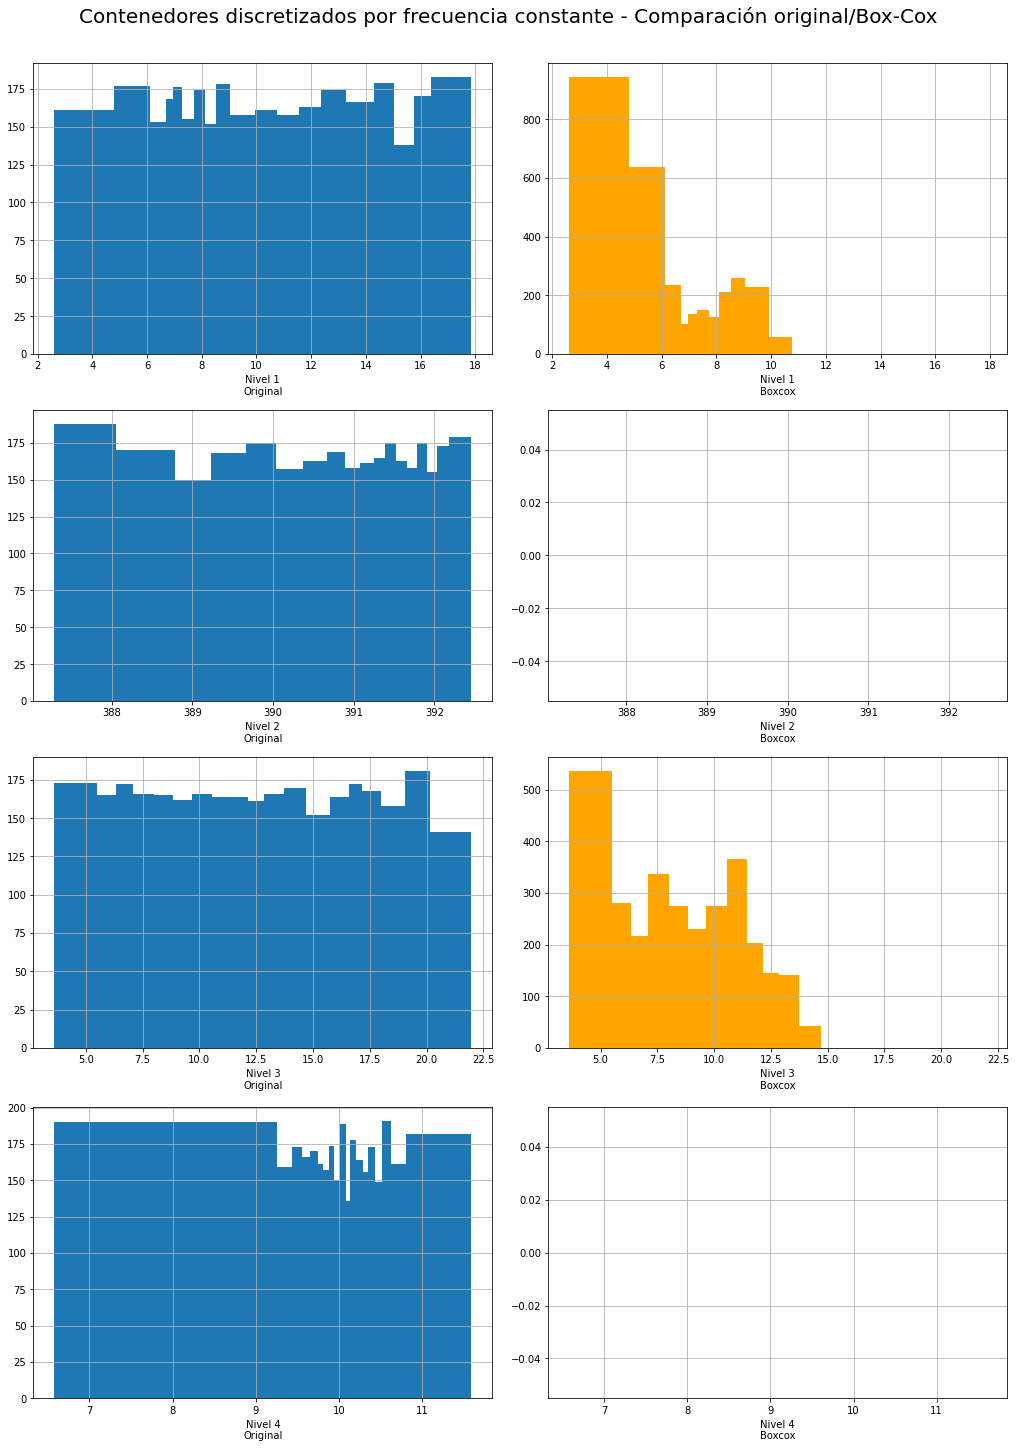

In [28]:
discomp(data, datadfc)

El uso de la discretización por frecuencia constante no nos generó distribuciones normales. El nivel 1 y 3 generaron distribuciones exponenciales. El 2 y el 4 no generaron nada. Se recomienda fuertemente intentar otro tipo de discretización. Veamos el comportamiento de las variables de manera continua para saber qué es lo mejor.

In [29]:
#Función: Genera las tablas comparativas (original/Box-Cox) de todas las
#variables de nivel continuas.
def concomp(d, n):
  fig, p = plt.subplots(4, 2, constrained_layout = True)
  j = 0
  k = 0
  for i in d:
    p[j][k].plot(d[i])
    p[j][k].grid()
    p[j][k].set(xlabel = i + '\nOriginal')

    k = 1
    arr, l = stats.boxcox(d[i])
    p[j][k].plot(arr, color = 'Red')
    p[j][k].grid()
    p[j][k].set(xlabel = i + '\nBoxcox')
    j += 1
    k = 0
    if i == n:
      break

  fig.suptitle('Contenedores - Comparación original/Box-Cox', fontsize = 20)
  fig.set_size_inches(24,20)

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


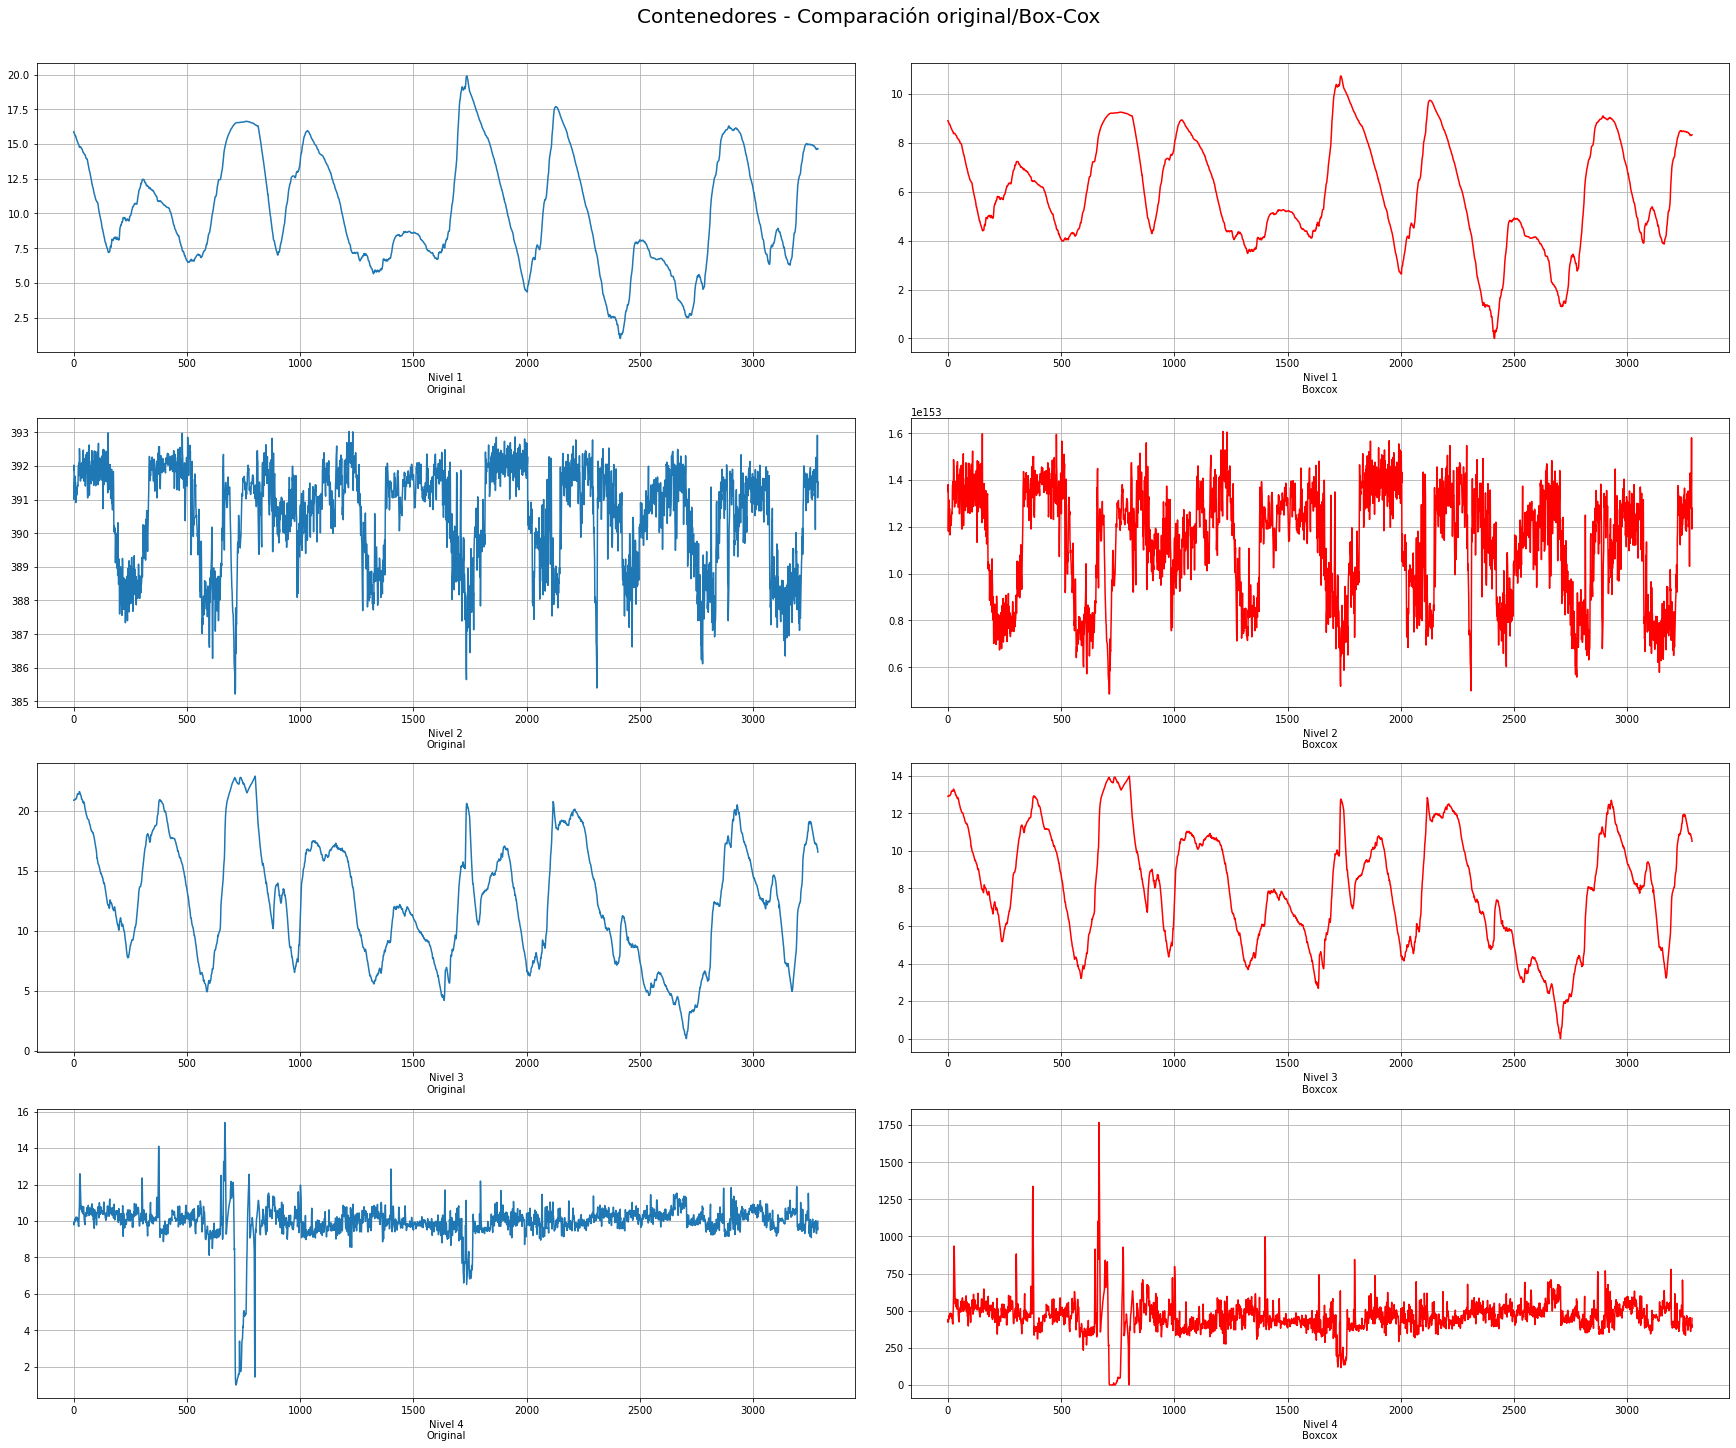

In [30]:
concomp(data, 'Nivel 4')

Mi sugerencia sería tomar en cuenta el espectro de los valores donde se encuentren la mayor cantidad de los datos. Por ejemplo en el nivel 1 entre el 7.5 y el 15. En el nivel 2 entre el 388 y 393. El Nivel 3 es un poco más difícil pero podríamos usar el espectro entre 7 y 18. Por último, el nivel 4 podríamos considerar el rango de 9 a 11.

###7- Discretizar las variables de Nivel (sin transformar) usando k-means. Proponga el valor de k y justifíquelo.

###8- Transformar cada variable discretizada y compararla con la original mediante el histograma. ¿Hubo mejoría con respecto a la discretización por año?


In [31]:
#Reiniciamos los valores del data frame original.
data = pd.read_excel("/content/drive/MyDrive/Maestría en ciencia de datos/2do semestre/Ingeniería de características/Laboratorio 2/Datos.xlsx")
data['Año'] = data['Fecha'].dt.year

,Fecha,Nivel 1,Nivel 2,Nivel 3,Nivel 4,Salida 1,Salida 2,Salida 3,Salida 4,Entrada 1,Entrada 2,Entrada 3,Entrada 4,Año
0,2006-01-01,532.88,391.88,182.86,85.68,9940000.0,16230000.0,30970000.0,29710000.0,6050000.0,9220000.0,22090000.0,5390000.0,2006
1,2006-01-02,532.87,392.02,182.86,85.80,44260000.0,50960000.0,42100000.0,48080000.0,4720000.0,7585000.0,37340000.0,700000.0,2006
2,2006-01-03,532.80,391.00,182.87,85.70,50180000.0,46700000.0,45940000.0,47790000.0,4460000.0,5950000.0,17540000.0,10140000.0,2006
3,2006-01-04,532.72,391.47,182.90,85.85,44850000.0,44290000.0,44900000.0,47690000.0,34740000.0,3260000.0,20250000.0,6600000.0,2006
4,2006-01-05,532.70,391.66,182.90,85.92,41690000.0,48170000.0,49080000.0,49140000.0,1910000.0,7340000.0,23180000.0,3390000.0,2006


[518.9068949789983, 526.7716163201687, 533.5294851697556]


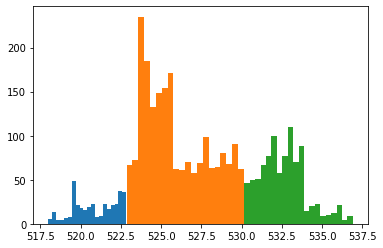

In [32]:
bins=3
m=data['Nivel 1'].min()
M=data['Nivel 1'].max()
esp=(M-m)/bins
ctr=[np.random.uniform(m+esp*i,M+esp*(i-bins+1)) for i in range(bins)]
print(ctr)

def distancia(a,b):
  return np.abs(a-b)
ctr=np.array(ctr)
distancia(ctr,2)
dst=distancia(np.array([-3,0,-1.5]),2)
min(dst),dst
dst=distancia(ctr,2)
np.where(dst==min(dst))[0][0]

Gr=[]
for i in range(bins):
  Gr.append([])
Gry=[]
for i in range(bins):
  Gry.append([])
  
for d,dy in zip(data['Nivel 1'],data['Año']):
  dst=distancia(ctr,d)                 # Medir la distancia entre los centroides y el dato 'd'
  indice=np.where(dst==min(dst))[0][0] # Averiguar el índice en donde la distancia es mínima
  Gr[indice].append(d)                 # Agregamos el dato 'd' al índice mínimo
  ###### Segunda vuelta ########
  Gry[indice].append(dy)
for i in range(bins):
  plt.hist(Gr[i],bins=20)

x_N1
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Nivel 1, dtype: object

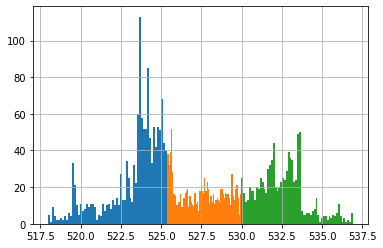

In [33]:
disc=KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='kmeans')
data['x_N1']=disc.fit_transform(data[['Nivel 1']],data['Año'])
data.groupby('x_N1')['Nivel 1'].hist(bins=60)

Decidí definir k = 3 ya que hay 3 protuberancias notables en el histograma mostrando una concentración de los datos en 3 secciones principales. Un k = 2 no hubiera sido viable ya que la tendencia del histograma no es binomial.

[387.49691675915824, 389.27528711256195, 392.7886267669377]


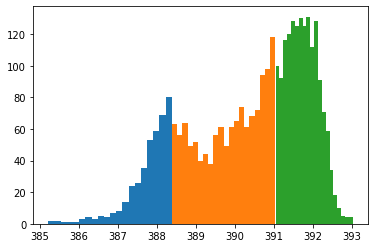

In [34]:
bins=3
m=data['Nivel 2'].min()
M=data['Nivel 2'].max()
esp=(M-m)/bins
ctr=[np.random.uniform(m+esp*i,M+esp*(i-bins+1)) for i in range(bins)]
print(ctr)

def distancia(a,b):
  return np.abs(a-b)
ctr=np.array(ctr)
distancia(ctr,2)
dst=distancia(np.array([-3,0,-1.5]),2)
min(dst),dst
dst=distancia(ctr,2)
np.where(dst==min(dst))[0][0]

Gr=[]
for i in range(bins):
  Gr.append([])
  
Gry=[]
for i in range(bins):
  Gry.append([])
  
for d,dy in zip(data['Nivel 2'],data['Año']):
  dst=distancia(ctr,d)                 # Medir la distancia entre los centroides y el dato 'd'
  indice=np.where(dst==min(dst))[0][0] # Averiguar el índice en donde la distancia es mínima
  Gr[indice].append(d)                 # Agregamos el dato 'd' al índice mínimo
  ###### Segunda vuelta ########
  Gry[indice].append(dy)
for i in range(bins):
  plt.hist(Gr[i],bins=20)

3 k-means me parecen correctos ya que los outliers del rango 385 -387 pueden estar generando un sesgo. Los otros dos clusters también se encuentran en una distribución semejante a la normal.

x_N2
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Nivel 2, dtype: object

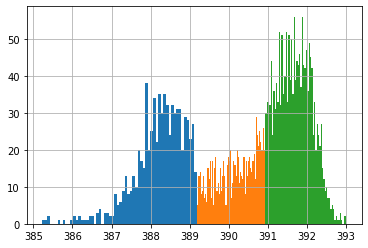

In [35]:
disc=KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='kmeans')
data['x_N2']=disc.fit_transform(data[['Nivel 2']],data['Año'])
data.groupby('x_N2')['Nivel 2'].hist(bins=60)

[166.48637181009568, 169.03145926927843, 174.9371076652647, 180.54151366597773]


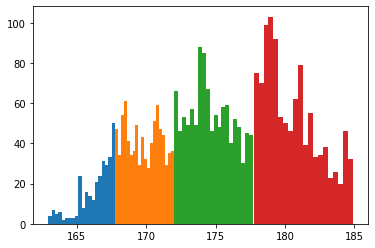

In [36]:
bins=4
m=data['Nivel 3'].min()
M=data['Nivel 3'].max()
esp=(M-m)/bins
ctr=[np.random.uniform(m+esp*i,M+esp*(i-bins+1)) for i in range(bins)]
print(ctr)

def distancia(a,b):
  return np.abs(a-b)
ctr=np.array(ctr)
distancia(ctr,2)
dst=distancia(np.array([-3,0,-1.5]),2)
min(dst),dst
dst=distancia(ctr,2)
np.where(dst==min(dst))[0][0]

Gr=[]
for i in range(bins):
  Gr.append([])
Gry=[]
for i in range(bins):
  Gry.append([])
  
for d,dy in zip(data['Nivel 3'],data['Año']):
  dst=distancia(ctr,d)                 # Medir la distancia entre los centroides y el dato 'd'
  indice=np.where(dst==min(dst))[0][0] # Averiguar el índice en donde la distancia es mínima
  Gr[indice].append(d)                 # Agregamos el dato 'd' al índice mínimo
  ###### Segunda vuelta ########
  Gry[indice].append(dy)
for i in range(bins):
  plt.hist(Gr[i],bins=20)

x_N3
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
3.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Nivel 3, dtype: object

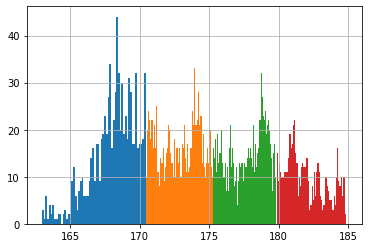

In [37]:
disc=KBinsDiscretizer(n_bins=4,encode='ordinal',strategy='kmeans')
data['x_N3']=disc.fit_transform(data[['Nivel 3']],data['Año'])
data.groupby('x_N3')['Nivel 3'].hist(bins=60)

Decidí hacer 4 k-means ya que cada centroide es equitativo con los demás.

[82.30780113010589, 86.9276471576505]


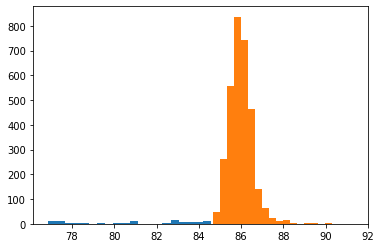

In [38]:
bins=2
m=data['Nivel 4'].min()
M=data['Nivel 4'].max()
esp=(M-m)/bins
ctr=[np.random.uniform(m+esp*i,M+esp*(i-bins+1)) for i in range(bins)]
print(ctr)

def distancia(a,b):
  return np.abs(a-b)
ctr=np.array(ctr)
distancia(ctr,2)
dst=distancia(np.array([-3,0,-1.5]),2)
min(dst),dst
dst=distancia(ctr,2)
np.where(dst==min(dst))[0][0]

Gr=[]
for i in range(bins):
  Gr.append([])
Gry=[]
for i in range(bins):
  Gry.append([])
  
for d,dy in zip(data['Nivel 4'],data['Año']):
  dst=distancia(ctr,d)                 # Medir la distancia entre los centroides y el dato 'd'
  indice=np.where(dst==min(dst))[0][0] # Averiguar el índice en donde la distancia es mínima
  Gr[indice].append(d)                 # Agregamos el dato 'd' al índice mínimo
  ###### Segunda vuelta ########
  Gry[indice].append(dy)
for i in range(bins):
  plt.hist(Gr[i],bins=20)

2 k fueron los que definí en el nivel 4 debido a que la mayor densidad de datos se ocncentra en el tercer cluster. Dejando este libre podemos generar una distribución normal probablemente.

x_N4
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Nivel 1, dtype: object

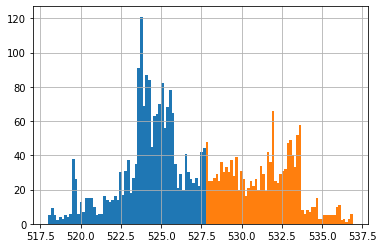

In [39]:
disc=KBinsDiscretizer(n_bins=2,encode='ordinal',strategy='kmeans')
data['x_N4']=disc.fit_transform(data[['Nivel 1']],data['Año'])
data.groupby('x_N4')['Nivel 1'].hist(bins=60)

En el método KBinsDiscretizer el único nivel que mejoró fué el 3, pues presenta una distribuciónq ue a simple vista se acerca un poco más a la normalidad.

###9- Use el valor de k en cada tanque para discretizar por Árboles de decisión usando la relación:
###*f(Entrada i, Salida 1) = Nivel i      i = [1, 2, 3 , 4]*
###obteniendo *k* contenedores finales.

In [40]:
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [41]:
#Reiniciamos los valores del data frame original.
data = pd.read_excel("/content/drive/MyDrive/Maestría en ciencia de datos/2do semestre/Ingeniería de características/Laboratorio 2/Datos.xlsx")
#Transformacion por saturación en Box-Cox (variable - min + 1)
n1_min = min(data['Nivel 1'])
data['Nivel 1'] = data['Nivel 1'] - n1_min + 1

,Fecha,Nivel 1,Nivel 2,Nivel 3,Nivel 4,Salida 1,Salida 2,Salida 3,Salida 4,Entrada 1,Entrada 2,Entrada 3,Entrada 4
0,2006-01-01,15.88,391.88,182.86,85.68,9940000.0,16230000.0,30970000.0,29710000.0,6050000.0,9220000.0,22090000.0,5390000.0
1,2006-01-02,15.87,392.02,182.86,85.80,44260000.0,50960000.0,42100000.0,48080000.0,4720000.0,7585000.0,37340000.0,700000.0
2,2006-01-03,15.80,391.00,182.87,85.70,50180000.0,46700000.0,45940000.0,47790000.0,4460000.0,5950000.0,17540000.0,10140000.0
3,2006-01-04,15.72,391.47,182.90,85.85,44850000.0,44290000.0,44900000.0,47690000.0,34740000.0,3260000.0,20250000.0,6600000.0
4,2006-01-05,15.70,391.66,182.90,85.92,41690000.0,48170000.0,49080000.0,49140000.0,1910000.0,7340000.0,23180000.0,3390000.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


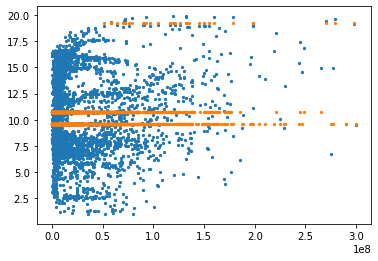

In [42]:
k=[3,3,4,2]
variables=data.drop(data.columns[[0, 5, 6,7,8,9,10,11,12]], axis=1)
#relación:
#obteniendo k contenedores finales.
arbolR=DecisionTreeRegressor(max_leaf_nodes=k[0])
X= data[["Entrada 1","Salida 1"]]
Y= data[["Nivel 1"]]
arbolR.fit(X,Y)
X['tree_Entrada']=arbolR.predict(X)
plt.scatter(data['Entrada 1'],Y,s=5)
plt.scatter(X['Entrada 1'],X['tree_Entrada'],s=5)
plt.show()

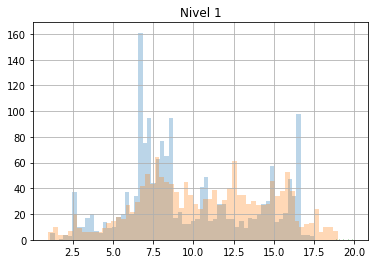

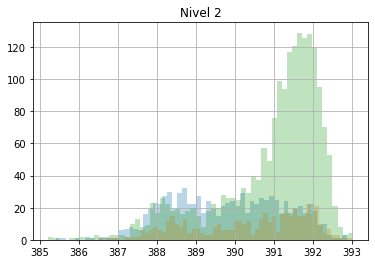

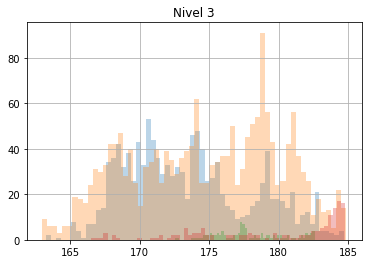

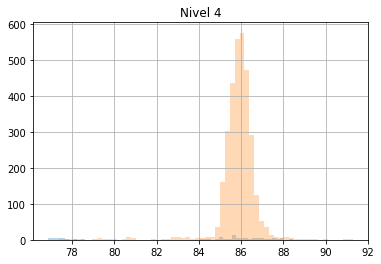

In [43]:
#Histogramas con el entrenamiento del arbo de decisiones
datatree=data.copy()
for i,j in enumerate(variables):
    arbolR=DecisionTreeRegressor(max_leaf_nodes=k[i])#max_depth=3)
    X= data[["Entrada {}".format(i+1),"Salida {}".format(i+1)]]
    Y= data[["Nivel {}".format(i+1)]]
    arbolR.fit(X,Y)
    name= "Disc_Tree"+str(i+1)
    datatree[name]=arbolR.predict(X)
    locals()['tree_values_{niv}'.format(niv=i+1)]= datatree[name].unique()
    datatree.groupby(name)[j].hist(bins=60, alpha = 0.3)
    plt.title('Nivel {}'.format(i+1))
    plt.show()

###10- Transforme de nuevo usando boxcox y compare los histogramas con sus correspondientes discretizaciones. ¿Encontró mejoría? ¿Qué discretización usaría?

0.7270390006850777
59.73689429803208
0.2116212436029405
21.084393991614785


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


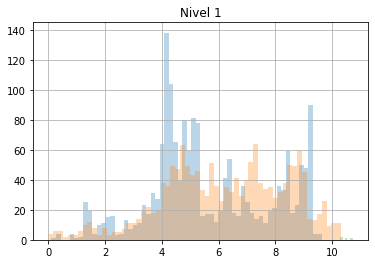

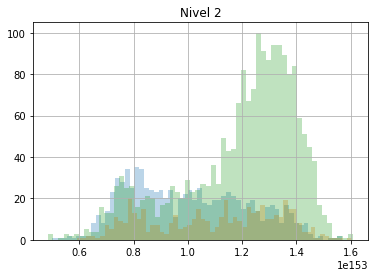

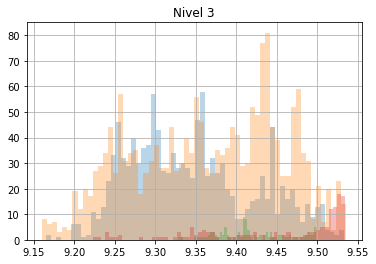

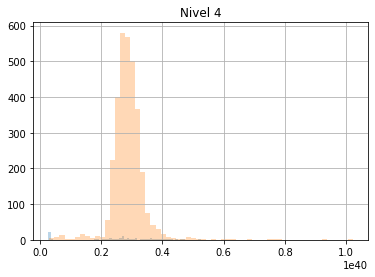

In [44]:
#Histogramas con conversión a Box-Cox
datatree=variables.copy()
dfboxcox(datatree, lbda)
for i,j in enumerate(variables):
    arbolR=DecisionTreeRegressor(max_leaf_nodes=k[i])#max_depth=3)
    X= data[["Entrada {}".format(i+1),"Salida {}".format(i+1)]]
    Y= data[["Nivel {}".format(i+1)]]
    arbolR.fit(X,Y)
    name= "Disc_Tree"+str(i+1)
    datatree[name]=arbolR.predict(X)
    locals()['tree_values_{niv}'.format(niv=i+1)]= datatree[name].unique()
    datatree.groupby(name)[j].hist(bins=60, alpha = 0.3)
    plt.title('Nivel {}'.format(i+1))
    plt.show()

Desafortunadamente no me fué posible encontrar mejoría. No encuentro un m´ñetodo acertado para corregir la distribución a normal. Posiblemente si a cada cluster le aplica una transformación diferente pueda llegar a algo más claro. Esto dependería que sesgo tienen las distribuciones de los clusters. Posiblemente pueda aplicar exponenciales en varios de ellos.




FIN.